In [1]:
# Week 4 | Task 4 | Hassan Ali

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Importing dataset, and spliting into features and target variables
df = pd.read_csv('kangaroo.csv')
df_X = df['Y']
df_y = df['X']

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.34e-15
Time:                        12:44:44   Log-Likelihood:                -233.38
No. Observations:                  45   AIC:                             470.8
Df Residuals:                      43   BIC:                             474.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8931     54.299      0.514      0.6

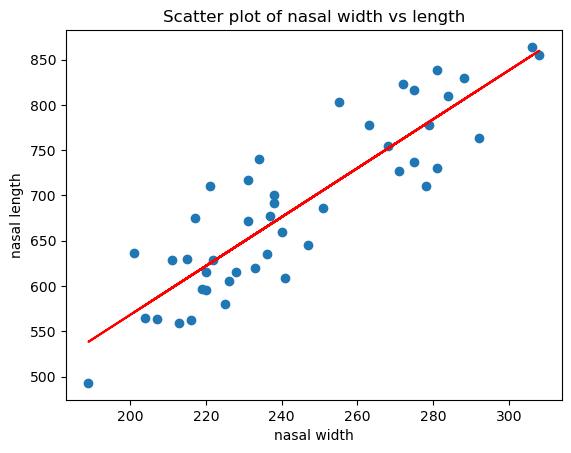

In [5]:
# Adding constant term to predictor
df_X = sm.add_constant(df_X)  

# Fitinf the linear regression model
model = sm.OLS(df_y, df_X).fit()

print(model.summary())
print()
print("Linear Reg: " + str(model.params['Y']) + "*x +" + str(model.params['const']))

# Scatter plot
plt.scatter(df['Y'], df['X'])
plt.xlabel('nasal width')
plt.ylabel('nasal length')
plt.title('Scatter plot of nasal width vs length')

# Regression line 
y_pred = model.predict(df_X)
plt.plot(df['Y'], y_pred, color='red')  
plt.show() 

In [7]:
def batch_gradient_descent(y, X, alpha, epsilon, 
                           plot_on=-1, plot_func=None):
    # Initializing our "guess" for each coefficient theta_j to 1 
    # and storing in a single column
    theta = np.ones(shape=(X.shape[1], 1))

    # Data points
    m = X.shape[0] 
    
    # Calculating column of predicted y values for each data point
    y_hat = X @ theta
    
    # calculatinf 1 by 1 matrix that holds the sum of the squared 
    # differences between each y_hat and y
    cost = np.transpose(y_hat - y) @ (y_hat - y)
    
    # initializing list of costs to contain the cost associated 
    # with our initial coefficients (scaled by 1/2m in accordance 
    # withthe cost formula)
    
    costs = [cost[0][0] / (2 * m)]
    
    # number of iterations
    i = 0 
    # Change in cost
    delta = 1 
    
    while (delta > epsilon):
        if (plot_on > 0 and i % plot_on == 0 and plot_func is not None):
            plot_func(theta)
        
        # calculating column that holds the difference between y_hat and
        # y for each data point
        differences = X @ theta - y
        
        # Updating each theta_j by the partial derivative of the cost with
        # respect to theta_j, scaled by learning rate
        
        # Note: np.transpose(X) gives us the observed values (x_j) for
        # a parameter j in the j'th row of a matrix
        theta = theta - (alpha / m) * ((np.transpose(X)) @ differences)
        
        # Using the updated coefficient values, append the new cost value
        cost = np.transpose(X @ theta - y) @ (X @ theta - y)
        costs.append(cost[0][0] / (2 * m))
        delta = abs(costs[i + 1] - costs[i])
        
        if (costs[i + 1] > costs[i]):
            print('Cost is increasing. Try reducing alpha.')
            break
        i += 1
    
    if (plot_on > 0 and i % plot_on == 0 and plot_func is not None):
        plot_func(theta)
        
    print('Completed in', i, 'iterations.')
    return theta

Completed in 13 iterations.


array([[2.81372133]])

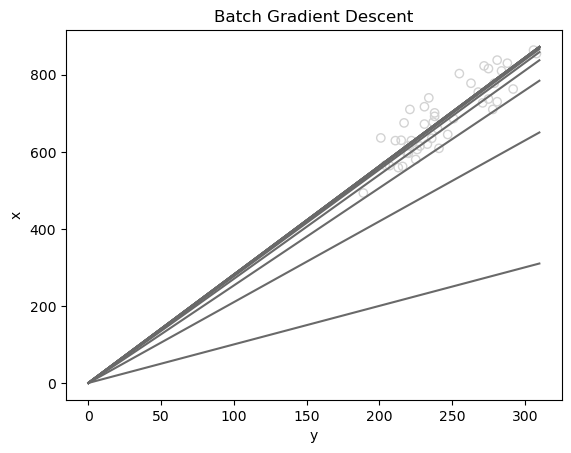

In [9]:
# Plotteing Batch Gradient Descent
df = pd.read_csv('kangaroo.csv')
df_X = df[['Y']]
df_y = df[['X']]

plt.xlabel('y')
plt.ylabel('x')
plt.title('Batch Gradient Descent')

plt.scatter(df.Y, df.X, facecolors='none', edgecolors='lightgray')

xt = np.arange(0, df.Y.max() + 5, 5)
yt = np.arange(0, df.X.max() + 10, 10)
x_prime = [xt[0], xt[-1]]

def plot_model(theta):
    y_hat = [xp * theta[0] for xp in x_prime]
    plt.plot(x_prime, y_hat, color='dimgrey')
    
df_X = df_X.to_numpy()
df_y = df_y.to_numpy()

batch_gradient_descent(y=df_y, X=df_X, alpha=0.00001, epsilon=10**-4,
                       plot_on=1, plot_func=plot_model)

Completed in 13 iterations.


array([[2.81372133]])

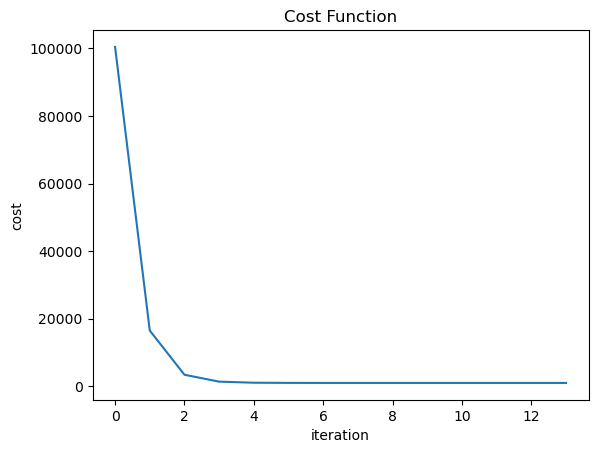

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performing batch gradient descent, like in the previous example,
# but plots the evolution of cost as opposed to the evolution of
# the regression line
def batch_gradient_descent(y, X, alpha, epsilon):
    theta = np.ones(shape=(X.shape[1], 1))
    m = X.shape[0]
    cost = np.transpose(X @ theta - y) @ (X @ theta - y)
    costs = [cost[0][0] / (2 * m)]
    
    i = 0
    delta = 1
    
    while (delta > epsilon):
        theta = theta - (alpha / m) * ((np.transpose(X)) @ (X @ theta - y))
                
        cost = np.transpose(X @ theta - y) @ (X @ theta - y)
        costs.append(cost[0][0] / (2 * m))
        delta = abs(costs[i + 1] - costs[i])
        
        if (costs[i + 1] > costs[i]):
            print('Cost is increasing. Try reducing alpha.')
            break
        i += 1
        
    print('Completed in', i, 'iterations.')
    # Plotting cost versus iteration
    plt.plot([i for i in range(len(costs))], costs)
    return theta

df = pd.read_csv('kangaroo.csv')
X = df[['Y']].to_numpy()
y = df[['X']].to_numpy()

# Setting up plotting environment
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Cost Function')
batch_gradient_descent(y=y, X=X, alpha=0.00001, epsilon=10**-4)